In [1]:
from RDM_DMET import RDM_DMET
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn



/home/romain/Documents/EPFL/C3MP/DRLDMET/DensityMatrix


/home/romain/.conda/envs/DRL/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Testing the methods
## Constructor
 

In [3]:
dm_solver = RDM_DMET([2,2],2,1,0,[[1],[2]],2,"generator_weights_2_5000.pth")



## Mean field solution

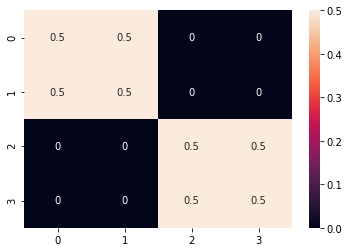

In [3]:
C = dm_solver.get_mean_field_orbitals(dm_solver.potential)
rho_mf = dm_solver.get_mf_density(dm_solver.potential)
sbn.heatmap(rho_mf,annot=True)
plt.show()

## Test if the index are correct

In [13]:
for i in np.arange(4):
    for j in np.arange(i+1,4):
        print(dm_solver.get_matrix_index(i,j))


0
1
2
3
4
5


## Test if rho 1 is correct

In [7]:
#rho2=np.asarray([[0.0947     ,    0 ,   0.1213  , -0.1213    ,     0 ,   0.0947],
 #        [0   , 0.0000    ,     0       ,  0   ,      0     ,    0],
 #  [ 0.1213   ,      0   , 0.1553  , -0.1553  ,       0 ,   0.1213],
 #  [-0.1213    ,     0  , -0.1553 ,   0.1553  ,       0,   -0.1213],
 #   [     0  ,       0      ,   0  ,       0 ,   0.0000  ,       0],
#    [0.0947    ,     0   , 0.1213 ,  -0.1213   ,      0 ,   0.0947]])
rho2 = 0.125*np.asarray([[1,0,1,-1,0,1],[0,0,0,0,0,0],[1,0,1,-1,0,1],[-1,0,-1,1,0,-1],[0,0,0,0,0,0],[1,0,1,-1,0,1]])
print(rho2)
print(dm_solver.double2single(rho2))
rho1=dm_solver.double2single(rho2)

[[ 0.125  0.     0.125 -0.125  0.     0.125]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 0.125  0.     0.125 -0.125  0.     0.125]
 [-0.125  0.    -0.125  0.125  0.    -0.125]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 0.125  0.     0.125 -0.125  0.     0.125]]
[[0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]]


## Test if energy is correct

In [9]:
B=dm_solver.get_schmidt_orbitals(dm_solver.potential,[1])
dm_solver = RDM_DMET([2,2],2,1,0,[[1],[2]],2,"generator_weights_2_5000.pth")

print(B)
print(dm_solver.H1(rho1,B))
print(dm_solver.H2(rho2,B))
print(dm_solver.H1(rho1,B)+dm_solver.H2(rho2,B))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-0.j 1.+0.j]]
(-2+0j)
0j
(-2+0j)


## Density optimize_2rdm

[-5.688456555331754, -5.685100524604609]


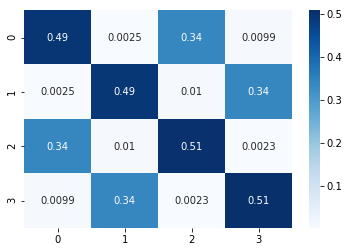

In [24]:
tmp_en =dm_solver.optimize_2rdm()
sbn.heatmap(np.abs(dm_solver.double2single(dm_solver.get_2rdm(dm_solver.p_gan_list[0]))),annot=True,cmap="Blues")
print(tmp_en)

## Check the continuity of E var

[0.         0.         1.         0.3559534  0.         0.
 1.         0.         0.         0.04122421]


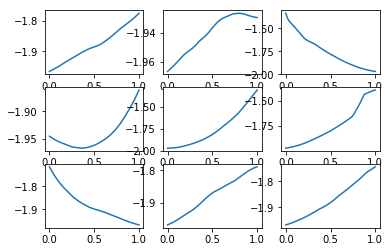

In [16]:
print(dm_solver.p_gan_list[0])

for i in np.arange(9):
    p_gan = dm_solver.p_gan_list[0].copy()
    p_gan[i]=0
    n_sim = 50
    Evar = np.zeros([n_sim])
    for runner_u,u in enumerate(np.linspace(0,1,n_sim)):
        p_gan[i]=u
        Evar[runner_u]=dm_solver.e_var(p_gan,dm_solver.get_schmidt_orbitals(dm_solver.potential,[0]))
    plt.subplot(3,3,i+1)
    plt.plot(np.linspace(0,1,n_sim),Evar)
plt.show()

In [17]:
print(dm_solver.p_gan_list[0])

[0.         0.         1.         0.3559534  0.         0.
 1.         0.         0.         0.04122421]
